In [2]:
import pandas as pd 

In [207]:
df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez_batch_16/main/orders.csv")

In [4]:
df.head(5)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [6]:
df.sample(5)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
8529,ZM6591QNDGCLFBBA,2016-09-14,LUWNGGUBOOZU0A5W,VR4RNJG8G2061G7D,2016-09-14 20:00:00+02:00,['Willie Taylor' 'Thomas Erb' 'Mark Heller' 'A...,429.0,Dinner,False
7624,VOYW6ISO7JACBCPD,2016-11-01,GJ13AJRXOBFA9H2A,GBYXXQO334VQ8MBE,2016-11-05 07:00:00+01:00,['John Adams' 'Matthew Seumanu' 'Teresa Walker'],613.0,Breakfast,False
10851,UILY3FY0FQ0LG562,2018-04-27,HJX36EDST857NJA0,PKAE43CRIORH89C6,2018-04-28 14:00:00+02:00,['Deborah Sable'],575.0,Lunch,False
167,OULJIDK8HJ36P760,2018-09-08,YVD4TUKH8NGGGCNZ,HYENPHTT6GZ7O2WY,2018-09-12 14:00:00+02:00,['Stefanie Parlato'],722.0,Lunch,False
9773,N72XM6QHJF19E7HL,2015-06-29,PEVZ4SFLNXIE2K4S,JHZLE4CBFRJR68KZ,2015-06-24 12:00:00+02:00,['Diana Lopez'],52.0,Lunch,True


In [18]:
df.isna().sum()

Order Id             0
Date                 0
Meal Id              0
Company Id           0
Date of Meal         1
Participants         1
Meal Price           1
Type of Meal         1
Heroes Adjustment    1
dtype: int64

In [9]:
df.shape

(14362, 9)

In [ ]:
df = df.dropna(subset=['Meal Price'])

In [10]:
df.dropna(inplace = True)

In [21]:
df.loc[df['Meal Price'].isna()==True]

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
14361,2NF38UES2LW6TR2A,2017-02-24,MOEZTCDKASD8Z0UP,I,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(14361, 9)

In [12]:
df.isna().sum()

Order Id             0
Date                 0
Meal Id              0
Company Id           0
Date of Meal         0
Participants         0
Meal Price           0
Type of Meal         0
Heroes Adjustment    0
dtype: int64

In [16]:
#Dropping columns
df.drop('Date',axis = 1)
df.drop(columns = ['Heroes Adjustment','Type of Meal'])

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0
...,...,...,...,...,...,...,...
14356,4A9VZGYFUFJVXVZJ,2017-08-31,G17L9DU9CZ2ZG9OG,I27J9NPYES4BIXBR,2017-09-04 09:00:00+02:00,['Margo Deslauriers'],329.0
14357,BD2DKH8I61Y0NL7Z,2018-01-12,4VLH5HYF70RP1YJK,I27J9NPYES4BIXBR,2018-01-16 14:00:00+01:00,['Sharon Goines' 'Margo Deslauriers'],280.0
14358,RFK2C21CD7IAOUZT,2016-06-30,EGQRRRN5D1Y97WGD,I27J9NPYES4BIXBR,2016-06-26 20:00:00+02:00,['Kenisha Ordonez'],49.0
14359,2UMDU938DTE7D808,2016-04-10,AV323CBF7N78MCYD,I27J9NPYES4BIXBR,2016-04-10 07:00:00+02:00,['Douglas Villanueva'],81.0


In [ ]:
#Dropping Rows
df.drop(labels = [1,2,40],axis = 0)
df.drop(range(10,100))

In [ ]:
#dropping null values wrt to one particular column make use of subset
df = df.dropna(subset=['Meal Price'])

In [22]:
#Understanding Pandas Dtypes
df.dtypes

Order Id              object
Date                  object
Meal Id               object
Company Id            object
Date of Meal          object
Participants          object
Meal Price           float64
Type of Meal          object
Heroes Adjustment     object
dtype: object

In [23]:
df['Date'] = df['Date'].astype('datetime64')

In [24]:
df.dtypes

Order Id                     object
Date                 datetime64[ns]
Meal Id                      object
Company Id                   object
Date of Meal                 object
Participants                 object
Meal Price                  float64
Type of Meal                 object
Heroes Adjustment            object
dtype: object

In [25]:
df['Date']

0       2016-05-27
1       2018-09-27
2       2014-08-24
3       2014-04-12
4       2015-07-28
           ...    
14357   2018-01-12
14358   2016-06-30
14359   2016-04-10
14360   2015-07-19
14361   2017-02-24
Name: Date, Length: 14362, dtype: datetime64[ns]

In [ ]:
1. Object 
2. int64
3. float64
4. bool 
5. datetime64
6. delta(Timedelta)
7. Category

In [29]:
df['Type of Meal']

0        Breakfast
1           Dinner
2            Lunch
3           Dinner
4            Lunch
           ...    
14357        Lunch
14358       Dinner
14359    Breakfast
14360    Breakfast
14361          NaN
Name: Type of Meal, Length: 14362, dtype: object

In [30]:
df['Type of Meal']  = df['Type of Meal'].astype('category')

In [31]:
df['Type of Meal']

0        Breakfast
1           Dinner
2            Lunch
3           Dinner
4            Lunch
           ...    
14357        Lunch
14358       Dinner
14359    Breakfast
14360    Breakfast
14361          NaN
Name: Type of Meal, Length: 14362, dtype: category
Categories (3, object): ['Breakfast', 'Dinner', 'Lunch']

In [33]:
df['Type of Meal'].cat.categories

Index(['Breakfast', 'Dinner', 'Lunch'], dtype='object')

In [34]:
df['Type of Meal'].cat.codes

0        0
1        1
2        2
3        1
4        2
        ..
14357    2
14358    1
14359    0
14360    0
14361   -1
Length: 14362, dtype: int8

In [36]:
df['Type of Meal'].cat.reorder_categories(['Lunch','Dinner','Breakfast'])

0        Breakfast
1           Dinner
2            Lunch
3           Dinner
4            Lunch
           ...    
14357        Lunch
14358       Dinner
14359    Breakfast
14360    Breakfast
14361          NaN
Name: Type of Meal, Length: 14362, dtype: category
Categories (3, object): ['Lunch', 'Dinner', 'Breakfast']

In [37]:
#Properties of datetime columns in pandas
#1. astype
#2. pd.to_datetime()

In [39]:
#1. properties by assuming all the row are of same format!
df.dtypes

Order Id               object
Date                   object
Meal Id                object
Company Id             object
Date of Meal           object
Participants           object
Meal Price            float64
Type of Meal         category
Heroes Adjustment      object
dtype: object

In [41]:
df['Date'] = df['Date'].astype('datetime64')
df['Date'].dt.date

0        2016-05-27
1        2018-09-27
2        2014-08-24
3        2014-04-12
4        2015-07-28
            ...    
14357    2018-01-12
14358    2016-06-30
14359    2016-04-10
14360    2015-07-19
14361    2017-02-24
Name: Date, Length: 14362, dtype: object

In [42]:
df['Date'].dt.month_name()

0              May
1        September
2           August
3            April
4             July
           ...    
14357      January
14358         June
14359        April
14360         July
14361     February
Name: Date, Length: 14362, dtype: object

In [49]:
df['Date'].dt.weekday

0        4
1        3
2        6
3        5
4        1
        ..
14357    4
14358    3
14359    6
14360    6
14361    4
Name: Date, Length: 14362, dtype: int64

In [53]:
df['Date'].dt.quarter

0        2
1        3
2        3
3        2
4        3
        ..
14357    1
14358    2
14359    2
14360    3
14361    1
Name: Date, Length: 14362, dtype: int64

In [55]:
df['Date'].dt.day_name()

0          Friday
1        Thursday
2          Sunday
3        Saturday
4         Tuesday
           ...   
14357      Friday
14358    Thursday
14359      Sunday
14360      Sunday
14361      Friday
Name: Date, Length: 14362, dtype: object

In [57]:
df['Date'].dt.year

0        2016
1        2018
2        2014
3        2014
4        2015
         ... 
14357    2018
14358    2016
14359    2016
14360    2015
14361    2017
Name: Date, Length: 14362, dtype: int64

In [61]:
df['Date']

0       2016-05-27
1       2018-09-27
2       2014-08-24
3       2014-04-12
4       2015-07-28
           ...    
14357   2018-01-12
14358   2016-06-30
14359   2016-04-10
14360   2015-07-19
14361   2017-02-24
Name: Date, Length: 14362, dtype: datetime64[ns]

In [60]:
df.Date

0       2016-05-27
1       2018-09-27
2       2014-08-24
3       2014-04-12
4       2015-07-28
           ...    
14357   2018-01-12
14358   2016-06-30
14359   2016-04-10
14360   2015-07-19
14361   2017-02-24
Name: Date, Length: 14362, dtype: datetime64[ns]

In [ ]:
#2. Assuming the data is very dirty

In [116]:
df_date = pd.DataFrame([
                        [['']],
                        [['January 14th, 2020']],
                        [['24/11/1996']],
                        [['07-07-2010']],
                        [['08/2010']],
                        [['2001']],
                        [['2008']]
                        ],columns = ['date'])

In [117]:
df_date['date_converted'] = df_date.date.apply(lambda x: pd.to_datetime(x).strftime("%m/%d/%Y")[0])

In [118]:
df_date

,date,date_converted
0,[],NaN
1,"[January 14th, 2020]",01/14/2020
2,[24/11/1996],11/24/1996
3,[07-07-2010],07/07/2010
4,[08/2010],08/01/2010
5,[2001],01/01/2001
6,[2008],01/01/2008


In [101]:
df_date['date_proper']

0           NaN
1    01-14-2020
2    11-24-1996
3    07-07-2010
4    08-01-2010
5    01-01-2001
6    01-22-2002
Name: date_proper, dtype: object

In [90]:
df['Meal Price'] = df['Meal Price'].apply(lambda x: x+100)

In [73]:
df['Meal Price']

0        669.0
1        222.0
2        514.0
3        638.0
4        890.0
         ...  
14357    480.0
14358    249.0
14359    281.0
14360    410.0
14361      NaN
Name: Meal Price, Length: 14362, dtype: float64

In [78]:
df['Type of Meal'].str.lower()

0        breakfast
1           dinner
2            lunch
3           dinner
4            lunch
           ...    
14357        lunch
14358       dinner
14359    breakfast
14360    breakfast
14361          NaN
Name: Type of Meal, Length: 14362, dtype: object

In [80]:
df['Type of Meal'].str.zfill(width=10)

0        0Breakfast
1        0000Dinner
2        00000Lunch
3        0000Dinner
4        00000Lunch
            ...    
14357    00000Lunch
14358    0000Dinner
14359    0Breakfast
14360    0Breakfast
14361           NaN
Name: Type of Meal, Length: 14362, dtype: object

In [91]:
df['Type of Meal'].str.pad(width = 20,side = 'right',fillchar= '0')

0        Breakfast00000000000
1        Dinner00000000000000
2        Lunch000000000000000
3        Dinner00000000000000
4        Lunch000000000000000
                 ...         
14357    Lunch000000000000000
14358    Dinner00000000000000
14359    Breakfast00000000000
14360    Breakfast00000000000
14361                     NaN
Name: Type of Meal, Length: 14362, dtype: object

In [120]:
#Apply 
def square(x):
  return x*x
df['Meal_squared_function'] = df['Meal Price'].apply(square)

In [121]:
df.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment,Meal_squared_function
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],769.0,Breakfast,False,591361.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],322.0,Dinner,False,103684.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],614.0,Lunch,False,376996.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],738.0,Dinner,False,544644.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],990.0,Lunch,False,980100.0


In [ ]:
Meal_squared_func tion 
insert a value 'A String Value' into 6000th index

In [127]:
df.loc[60000,'Meal_squared_function'] = 'A string Value'

In [128]:
df.tail()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment,Meal_squared_function,Meal Squared
14358,RFK2C21CD7IAOUZT,2016-06-30,EGQRRRN5D1Y97WGD,I27J9NPYES4BIXBR,2016-06-26 20:00:00+02:00,['Kenisha Ordonez'],349.0,Dinner,False,121801,NaN
14359,2UMDU938DTE7D808,2016-04-10,AV323CBF7N78MCYD,I27J9NPYES4BIXBR,2016-04-10 07:00:00+02:00,['Douglas Villanueva'],381.0,Breakfast,False,145161,NaN
14360,NEER4D5TN6GQV9WA,2015-07-19,RDLHP30JLO9RYWDR,I27J9NPYES4BIXBR,2015-07-21 09:00:00+02:00,['Douglas Villanueva' 'Kenisha Ordonez'],510.0,Breakfast,False,260100,NaN
14361,2NF38UES2LW6TR2A,2017-02-24,MOEZTCDKASD8Z0UP,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A string Value,A string Value


In [ ]:
df['Col_name | Col_criteria']['Row_index_label | Row_criteria']

In [129]:
df['Meal_squared_function'][df['Meal_squared_function'].apply(lambda x: isinstance(x,str))].index

Int64Index([60000], dtype='int64')

In [ ]:
1. Dropping null values 
2. Replace the null values

In [133]:
#Arithmetic Mean = Average  = Sum(All the values)/total 
df['Meal Price'] = df['Meal Price'].fillna(df['Meal Price'].mean())
df['Meal Price'] = df['Meal Price'].replace(0,df['Meal Price'].mean())

In [132]:
df['Meal Price'].tail()

14358    349.000000
14359    381.000000
14360    510.000000
14361    703.973404
60000    703.973404
Name: Meal Price, dtype: float64

In [134]:
df['Meal Squared'] = df['Meal Squared'].fillna(df['Meal Price'].mean())

In [135]:
df['Meal Squared']

0               704.071
1               704.071
2               704.071
3               704.071
4               704.071
              ...      
14358           704.071
14359           704.071
14360           704.071
14361           704.071
60000    A string Value
Name: Meal Squared, Length: 14363, dtype: object

In [ ]:
#Default Functions for Pandas
df['Meal Squared'].apply()
df['Meal Price'].fillna()
df['Meal Price'].replace()

#Custom Function 
def cube(x):
  return x*x*x

df['Meal Price'].apply(lambda x: x*x*x)

In [137]:
df['Meal Price'].map(lambda x:x*x)

0        591361.000000
1        103684.000000
2        376996.000000
3        544644.000000
4        980100.000000
             ...      
14358    121801.000000
14359    145161.000000
14360    260100.000000
14361    495578.553377
60000    495578.553377
Name: Meal Price, Length: 14363, dtype: float64

In [139]:
df.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment,Meal_squared_function,Meal Squared
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],769.0,Breakfast,False,591361,704.071
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],322.0,Dinner,False,103684,704.071
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],614.0,Lunch,False,376996,704.071
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],738.0,Dinner,False,544644,704.071
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],990.0,Lunch,False,980100,704.071


In [138]:
#Adding rows or Combining DataFrames

In [140]:
new_rows = {'Order Id': ['97OX39BGVMHODL23223','97OX39BGVMHODL323123'],
            'Date':['2014-08-24','2014-08-24'],
            'Meal Id':['J0MMOOPP709DIDI23','J0MMOOPP709DIDIE23']}

In [141]:
df = df.append(new_rows,ignore_index=True) #adds row by row

In [143]:
df_rows = pd.DataFrame(new_rows)

In [144]:
df_rows.head()

,Order Id,Date,Meal Id
0,97OX39BGVMHODL23223,2014-08-24,J0MMOOPP709DIDI23
1,97OX39BGVMHODL323123,2014-08-24,J0MMOOPP709DIDIE23


In [145]:
df_new = pd.concat([df,df_rows],ignore_index = True)

In [146]:
df_new.tail()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment,Meal_squared_function,Meal Squared
14361,2NF38UES2LW6TR2A,2017-02-24 00:00:00,MOEZTCDKASD8Z0UP,I,NaN,NaN,703.973404,NaN,NaN,NaN,704.071
14362,NaN,NaT,NaN,NaN,NaN,NaN,703.973404,NaN,NaN,A string Value,A string Value
14363,"[97OX39BGVMHODL23223, 97OX39BGVMHODL323123]","[2014-08-24, 2014-08-24]","[J0MMOOPP709DIDI23, J0MMOOPP709DIDIE23]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14364,97OX39BGVMHODL23223,2014-08-24,J0MMOOPP709DIDI23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14365,97OX39BGVMHODL323123,2014-08-24,J0MMOOPP709DIDIE23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_new_withoutignore = pd.concat([df,df_rows])

In [157]:
df_new_withoutignore['Order Id'][0]

0       839FKFW2LLX4LMBB
0    97OX39BGVMHODL23223
Name: Order Id, dtype: object

In [168]:
df_new_copy = df.copy()

In [169]:
df_new_copy.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [179]:
df_new_dups = pd.concat([df_new_copy,df])

In [180]:
df_new_dups.shape

(28724, 9)

In [177]:
df_new_dups.drop_duplicates(subset=['Order Id','Date'],inplace = True,keep = 'last')

In [182]:
df_new_dups.duplicated().sum()

14362

In [186]:
df.loc[60000,"Meal Price"] = "A new string"

In [187]:
df['Meal Price'].apply(lambda x: type(x)).value_counts()

<class 'float'>    14362
<class 'str'>          1
Name: Meal Price, dtype: int64

In [190]:
df['Meal Price'][df['Meal Price'].apply(lambda x: isinstance(x,str))].index

Int64Index([60000], dtype='int64')

In [ ]:
#Name
#?Name
df.fillna(0)

In [ ]:
#Merge

In [191]:
order_data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez_batch_16/main/order_leads.csv")

In [192]:
sales_data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez_batch_16/main/sales_team.csv")

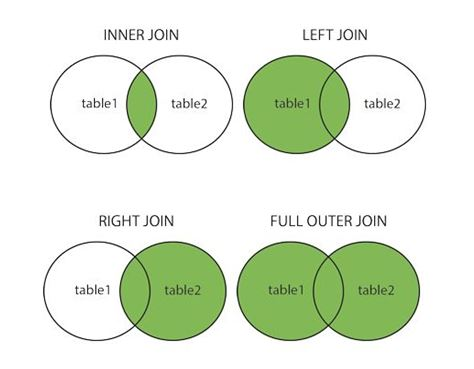

In [193]:
order_data.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875.0,1.0
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425.0,0.0
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837.0,0.0
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343.0,0.0
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983.0,0.0


In [194]:
sales_data.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,Jessie Mcallister,97UNNAT790E0WM4N,Chimera-Chasing Casbah,LJKS5NK6788CYMUU
1,Jessie Mcallister,97UNNAT790E0WM4N,Tangential Sheds,36MFTZOYMTAJP1RK
2,Jessie Mcallister,97UNNAT790E0WM4N,Two-Mile Grab,H3JRC7XX7WJAD4ZO
3,Jessie Mcallister,97UNNAT790E0WM4N,Three-Men-And-A-Helper Congo'S,HB25MDZR0MGCQUGX
4,Jessie Mcallister,97UNNAT790E0WM4N,Biophysical Battleground,7RVA8TIVBLBXMNO4


In [195]:
df.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690,Lunch,False


In [196]:
pd.merge(df,order_data,on = 'Order Id')

,Order Id,Date_x,Meal Id,Company Id_x,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment,Company Id_y,Company Name,Date_y,Order Value,Converted
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469,Breakfast,False,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837.0,0.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22,Dinner,False,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343.0,0.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314,Lunch,False,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185.0,0.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438,Dinner,False,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839.0,0.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690,Lunch,False,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,344K78BVPMQ3UKX4,2017-05-15,S30KDKX1JA90MV7G,I9SNN0NI7ETOAN9C,2017-05-18 22:00:00+02:00,['Richard Flores' 'Barbara Braziel' 'Chris Mor...,213,Dinner,False,I9SNN0NI7ETOAN9C,Hunkerish Bottineau,2017-05-15,2839.0,1.0
13382,KWIAJ8L4YW5SZWZG,2018-07-17,23YSFGABUPN92QIS,I9SNN0NI7ETOAN9C,2018-07-18 07:00:00+02:00,['Richard Flores'],541,Breakfast,False,I9SNN0NI7ETOAN9C,Hunkerish Bottineau,2018-07-17,7517.0,0.0
13383,4BG0QG7Z0GP2VLHJ,2014-07-14,GRDNQR5P1CCT6NIP,LF85GK2DBRYS10ZA,2014-07-17 12:00:00+02:00,['Nancy Avery' 'Dennis Powell'],145,Lunch,False,LF85GK2DBRYS10ZA,Watery Barge,2014-07-14,1785.0,0.0
13384,RHWPAUYMZAUR4790,2015-05-04,49KFEY8GRRWND4T2,LF85GK2DBRYS10ZA,2015-05-03 08:00:00+02:00,['Dennis Powell' 'Bryan Perkins'],193,Breakfast,False,LF85GK2DBRYS10ZA,Watery Barge,2015-05-04,2164.0,0.0


In [204]:
pd.merge(df[['Order Id','Meal Id']],
         order_data.rename(columns = {'Order Id':'Alternate Id'}),
         left_on = 'Order Id',
         right_on = 'Alternate Id')

,Order Id,Meal Id,Alternate Id,Company Id,Company Name,Date,Order Value,Converted
0,839FKFW2LLX4LMBB,INBUX904GIHI8YBD,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837.0,0.0
1,97OX39BGVMHODLJM,J0MMOOPP709DIDIE,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343.0,0.0
2,041ORQM5OIHTIU6L,E4UJLQNCI16UX5CS,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185.0,0.0
3,YT796QI18WNGZ7ZJ,C9SDFHF7553BE247,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839.0,0.0
4,6YLROQT27B6HRF4E,48EQXS6IHYNZDDZ5,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841.0,0.0
...,...,...,...,...,...,...,...,...
13381,344K78BVPMQ3UKX4,S30KDKX1JA90MV7G,344K78BVPMQ3UKX4,I9SNN0NI7ETOAN9C,Hunkerish Bottineau,2017-05-15,2839.0,1.0
13382,KWIAJ8L4YW5SZWZG,23YSFGABUPN92QIS,KWIAJ8L4YW5SZWZG,I9SNN0NI7ETOAN9C,Hunkerish Bottineau,2018-07-17,7517.0,0.0
13383,4BG0QG7Z0GP2VLHJ,GRDNQR5P1CCT6NIP,4BG0QG7Z0GP2VLHJ,LF85GK2DBRYS10ZA,Watery Barge,2014-07-14,1785.0,0.0
13384,RHWPAUYMZAUR4790,49KFEY8GRRWND4T2,RHWPAUYMZAUR4790,LF85GK2DBRYS10ZA,Watery Barge,2015-05-04,2164.0,0.0


In [211]:
#Reshape our Dataframe! 
import numpy as np
df_grouped = df.groupby(['Type of Meal','Company Id']).agg({"Meal Price":np.mean})

In [212]:
df_grouped

Meal Price
Type of Meal Company Id                  
Breakfast    00CVEIVO8C92FFBO  346.500000
             00WJ866YXWT58K2S  392.166667
             01W2DWJSSYIMC2CP  611.333333
             0215YHE3CHAJKSYO  243.500000
             02JRY9T4F276E98L  486.666667
...                                   ...
Lunch        ZXS1AR3G66YR07K4  160.000000
             ZY7DXD1BH8M8N2UW  492.666667
             ZZ2R72YGH1JQH2OB  606.000000
             ZZY3WSHGJWPKJBCV  511.333333
             ZZYB9JLJKXRH7U6O  149.000000

[3976 rows x 1 columns]

In [215]:
pd.pivot_table(df,index= ['Type of Meal','Company Id'],values = 'Meal Price',aggfunc = np.mean)

Meal Price
Type of Meal Company Id                  
Breakfast    00CVEIVO8C92FFBO  346.500000
             00WJ866YXWT58K2S  392.166667
             01W2DWJSSYIMC2CP  611.333333
             0215YHE3CHAJKSYO  243.500000
             02JRY9T4F276E98L  486.666667
...                                   ...
Lunch        ZXS1AR3G66YR07K4  160.000000
             ZY7DXD1BH8M8N2UW  492.666667
             ZZ2R72YGH1JQH2OB  606.000000
             ZZY3WSHGJWPKJBCV  511.333333
             ZZYB9JLJKXRH7U6O  149.000000

[3976 rows x 1 columns]

In [217]:
df.sort_values(by = 'Meal Price',ascending=False)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
8052,WXM0QNI0RBRCSUC6,2015-10-14,TT1GL112YCQMH24T,YDXCCT6EBWNFPHKC,2015-10-15 21:00:00+02:00,['Michael Halton' 'Nathaniel Smartt'],1065.0,Dinner,False
6598,SRMNI57PCS3K3RHC,2018-03-08,HVB3I2BB7N6EXS0A,9Y6AVL8O0FHJLIZU,2018-03-11 07:00:00+01:00,['Bruce Rotz' 'Virginia Felix'],1059.0,Breakfast,True
8019,WBOAII20GC0UBG5N,2014-07-04,6WDW30TEDZ65NLL9,NDNF1LAUEOKZC7OL,2014-07-03 07:00:00+02:00,['Bobby Boren'],1032.0,Breakfast,False
10265,YK6EV3OK571JWNZ5,2014-11-13,ZV9P8OEGV5DVODIQ,9JNCAL2QWZ7J71CN,2014-11-14 13:00:00+01:00,['Carl Loza'],1022.0,Lunch,False
8658,QSBHI10J2TQDL4WZ,2016-10-30,NZW0D0543YZWR0N6,DWZ3RFGP1W0YZ75P,2016-10-28 14:00:00+02:00,['Mae Coffee'],1005.0,Lunch,False
...,...,...,...,...,...,...,...,...,...
1041,F0V2MJRPKZ7BWHWT,2014-09-09,QKA5WM62J5SLU800,1E8UMY3GLYW9NX51,2014-09-08 20:00:00+02:00,['Carol Salazar'],7.0,Dinner,False
984,KSA52K4CEJ6X6TMO,2014-04-28,NJFKAPUUJN23PQSI,A5LFM40Z21P7VS3V,2014-04-29 09:00:00+02:00,['Tonya Hargrove' 'Laura Maldonado' 'Kyong Fre...,7.0,Breakfast,False
8565,EO1MAD8J9A6VCK9A,2018-03-27,AN7KC30NR6BHZ1QW,FEVHP1BBGYIR3Y6P,2018-03-23 21:00:00+01:00,['Christina Mandrell' 'Thomas Patel'],7.0,Dinner,False
9814,DRN2P0A0ONAEPXTE,2014-11-19,HD219FNP8G5DD3GU,3HHXK7ISUA0DB6ZO,2014-11-22 13:00:00+01:00,['Steven Franks'],7.0,Lunch,False


In [ ]:
#Homeworks: 
#Stack and unstack
#reduce 
#filter

#Quiz - not objective quiz! share your screen and do it! 
#Test next Sunday! - Scholarship Test! 